# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 3 (Thu)**



### Student Information 

Full Name: Soriano, Edneil E. Jr. \
Student No.: 2020 - 02420 \
Section: HX-2


### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### Submission Information

_Date and Time Submitted (most recent upload)_: 11/09/2022  11:05 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Edneil E. Soriano Jr.

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [1]:
import numpy as np
import math

a = 0 # we initialize the bound of integration as a and b
b = 5
N = np.array([10, 100, 1000]) #array
H = (b - a)/N    #array, width of each trapezoid


# We now have two arrays for N and h

# next, we define the function of interest as a function so we can call it easily later (much wow)

def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5   


"""
Now, we use the formula from the book (eq. 5.3) to approximate the integral.
First, we define a function to perform the trapezoidal rule using a single value from N and H
We need to separate the terms that are not included in the summations, let us denote them as s 

input: specific n and h from the arrays N and H

output: integral approximation using trapezoidal rule

"""

def trapezoidal(func, n, h, a, b):
  s = (func(a)/2 + func(b)/2)           # Just the values of the bounds
  for k in range(1, n):           
    s += func(a + k*h)               # We do the summation in eq. 5.3
  return h*s                      # This returns the approximate integral given an N

"""
Now, we iterate the function trapezoidal() over all values in N; first we initialize an array to store results

"""
result_array = np.zeros(len(N))       # we will store the answers here

for i in range(len(N)):
  result = trapezoidal(f, N[i], H[i], a, b)
  result_array[i] = result
  
print("Trapezoidal Rule Results " + str(result_array))


"""
The first element of the array result is for N=10, then N=100. We can add more n values in the N array
above to increase the slices for maximum epik. This won't break the code (I think). 

"""


Trapezoidal Rule Results [1471.4375     1450.21458125 1450.00214583]


"\nThe first element of the array result is for N=10, then N=100. We can add more n values in the N array\nabove to increase the slices for maximum epik. This won't break the code (I think). \n\n"

In [2]:
"""
We know that by solving it analytically the value of the integral is 1450.
Hence, we can calculate the percent errors by calling an error function
with the result_array array as its argument. 

"""

def e(x):
  return abs((x - 1450)/1450)

E = e(result_array)

print("Trapezoidal Rule Errors " + str(E)) # the first element corresponds to N = 10, then 100, then etc..

Trapezoidal Rule Errors [1.47844828e-02 1.47987069e-04 1.47988491e-06]


In [3]:
"""
We define a function that performs Simpson's rule given a particular n slices and h. 
"""

def simpson(func, n, h, a, b):
  s_2 = func(a) + func(b)         # we have an initial value for s

  for k in range(1, n, 2):
    s_2 += 4 * func(a + k*h)     # we apply the summation over all odds
  for k in range(2, n, 2):
    s_2 += 2 * func(a + k*h)     # we apply the summation over all evens

  s_2 = s_2*(1/3)*h           # we multiply the sums to the h/3 factor

  return s_2

# Now, we iterate over all values of N and H, using the simpson() function

result_array_2 = np.zeros(len(N))     # this is where we will store the results for Simpson's Rule


for i in range(len(N)):
  result = simpson(f, N[i], H[i], a, b)
  result_array_2[i] = result

print("Simpson's Rule Results " + str(result_array_2))

# We already defined a function for error e(), we will use this to get the errors:

E_2 = e(result_array_2)
print("Simpson's Rule Errors " + str(E_2))

Simpson's Rule Results [1450.08333333 1450.00000833 1450.        ]
Simpson's Rule Errors [5.74712644e-05 5.74712666e-09 5.75333804e-13]


We can see that the errors for the Simpson's Rule approximation is much much less than by using the Trapezoidal rule. The errors for the Trapezoidal rule scale down by a factor of 10^2 while that of the Simpson's rule scale down by a factor of 10^4, given that we increase N by a factor of 10. 


### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} \mbox{d}x $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [4]:
"""
First, we choose an initial number of steps. Then, we initialize the desired error and integration bound in variables
because it's an epik gamer move. Also, we define the integrand of I for item 2.  

input: array/ float
output: evaluated function
"""

# ================ FILL THESE OUT: ================
a_bound = 0
b_bound = 1                                # bounds for integration, a muna bago b
des_err = 10**(-6)                         # desired error, use something LESS than 1 because duh
N_adap_1 = 1                               # initial slices

def g(x):
    return (math.sin(math.sqrt(100*x)))**2 # put integrand here

# ================ DON'T FILL ANYTHING BEYOND THIS POINT ================

"""
We define eq(5.34) below;

args: function of interest(func) - function, 
      previous integral approximation(I_prev) - float,
      current number of slices(N) - int,
      current width of slices(h) - float,
      a and b are the bounds of integration. 
output: integral approximation (float)
"""


def eval_curr(func, I_prev, N, h, a, b):    # this is just eq(5.34)
    s = 0.5 * I_prev
    for k in range(1, N, 2):
        s += h * func(a + k*h)
    
    return s

"""
Then, we calculate the error using eq(5.30). We repeat this process until we get an error equal to or slightly
less than des_err. 
"""

def error_adap(I, I_prev):                  # this is just eq(5.30)
    return abs((1/3)*(I - I_prev))

"""
we define the adaptive trapezoidal function below

args:

g - integrand (python function)
eval_curr - implementation of equation 5.34 of Newman (python function)
error_adap - implementation of equation 5.30 of Newman (python function)
trapezoidal - implentation of equation 5.3 of Newman; normal Trapezoidal rule (python function)
N_adap_1 - initial number of slices (int)
a_bound / b_bound - integration bounds (float)

output: three arrays including the slices N, the errors, and the integral approximations
"""


def adap_trapezoidal(g, eval_curr, error_adap, trapezoidal, N_adap_1, a_bound, b_bound):
    
    h_adap_1 = (b_bound - a_bound)/N_adap_1    # initial width of slices

# Now, we calculate the initial approximation using the trapezoidal(func, n, h, a, b) function. 
# We instead use g(x) instead of f(x) for func, but the equation is the same (5.3). 

    I_adap_1 = trapezoidal(g, N_adap_1, h_adap_1, a_bound, b_bound) # initial approximation

# Given this initial evaluated integral, our goal is double the number of slices and then approximate that integral as 
# I_adap_2. We can use eq(5.34) to calculate this next integral in order for us to avoid extra calculations. 

# Then, we calculate the error using eq(5.30). We repeat this process until we get an error equal to or slightly
# less than des_err. Note that the two equations mentioned are implemented as python functions. 

    N_adap = np.array([N_adap_1])               # initialize values for slices, make it an array
    h_adap = np.array([h_adap_1])
    errors_adap = np.array([0.01])                 # we initialize the errors of each step for later. We set the initial error to 1
                                                # but in reality there should be no value here. I didn't choose 0 as a place holder
                                                # because the while loop below will break. 
    results_array_adap = np.array([I_adap_1])   # we also initialize an array of the integral estimates for graphing 
    count = 0            
    
    while errors_adap[-1] >= des_err:
    
        N_adap = np.append(N_adap, N_adap[count] * 2)         # update array containing number of slices 
        next_h_adap = (b_bound - a_bound) / N_adap[count + 1] # use the latest N to compute the latest h
        h_adap = np.append(h_adap, next_h_adap)               # store it in the array
        I_adap_curr = eval_curr(g, results_array_adap[count], N_adap[count + 1], h_adap[count + 1], a_bound, b_bound) # evaluate next integral
        results_array_adap = np.append(results_array_adap, I_adap_curr) # store it in the array
        error_adap_curr = error_adap(results_array_adap[count + 1], results_array_adap[count])  # evaluate error
        errors_adap = np.append(errors_adap, error_adap_curr)  # store it in the array

        count += 1 # add 1 to the counter
    
    return(N_adap, errors_adap, results_array_adap)

N_adap = adap_trapezoidal(g, eval_curr, error_adap, trapezoidal, N_adap_1, a_bound, b_bound)[0]
errors_adap = adap_trapezoidal(g, eval_curr, error_adap, trapezoidal, N_adap_1, a_bound, b_bound)[1]
results_array_adap = adap_trapezoidal(g, eval_curr, error_adap, trapezoidal, N_adap_1, a_bound, b_bound)[2]

print(N_adap)
print(errors_adap)
print(results_array_adap)


# the three arrays returned are :
# the slices N (1st), the errors (2nd), the integral approximations (3rd)
    

[   1    2    4    8   16   32   64  128  256  512 1024 2048 4096]
[1.00000000e-02 5.90841411e-02 6.23503143e-02 3.64284674e-02
 9.03530694e-03 6.10376550e-03 1.83275514e-03 4.78524386e-04
 1.20920693e-04 3.03110661e-05 7.58282692e-06 1.89602308e-06
 4.74025542e-07]
[0.14797948 0.32523191 0.51228285 0.40299745 0.43010337 0.44841467
 0.45391293 0.4553485  0.45571127 0.4558022  0.45582495 0.45583064
 0.45583206]


In [5]:
"""
Now, we perform Romberg integration as stated in page 160-161 of the Newman text.
"""


# ================ FILL THESE OUT: ================

N_romb_1 = 1     # fill this out, initial number of slices
size = 7        # size of the romberg matrix, it's easy to change this and the program is fast enough to do it manually. 

# ================ DON'T FILL ANYTHING BEYOND THIS POINT ================


h_romb_1 = (b_bound - a_bound) / N_romb_1    
romberg_matrix = np.zeros((size, size))   # create zero matrix, for later use

N_romb = np.array([N_romb_1])
h_romb = np.array([h_romb_1])
errors_romb = np.array([0.01])        # set the arrays for storage


for i in range(size):              # this will fill out row 1
    N_romb = np.append(N_romb, N_romb[i] * 2)                     # update next N as per adaptive trapezoidal
    h_romb = np.append(h_romb, (b_bound - a_bound) / N_romb[-1])  # update next h as per adaptive trapezoidal
    romberg_matrix[i, 0] = trapezoidal(g, N_romb[i], h_romb[i], a_bound, b_bound) # adaptive trapezoidals in row 1

for m in np.arange(1, size):     # iterate over columns filled with 0's
    for i in np.arange(m, size): # iterate over the rows that constitute the lower triangle of the matrix
        romberg_matrix[i, m] = romberg_matrix[i, m-1] + (romberg_matrix[i, m-1] - romberg_matrix[i-1, m-1])/(4**m - 1) # this is just equation 5.51
    curr_err_romb = abs(romberg_matrix[m, m-1] - romberg_matrix[m-1,m-1])/(4**m - 1) # calculate error of the penultimate entry on row
    errors_romb = np.append(errors_romb, curr_err_romb)                       # store the result
    
N_romb = np.delete(N_romb, -1)   # remove the extra step from line 17
results_array_romb = np.diagonal(romberg_matrix)  # get the diagonals of the romberg matrix cuz that's what we're gonna plot

print(N_romb)
print(errors_romb)
print(results_array_romb)

[ 1  2  4  8 16 32 64]
[1.00000000e-02 5.90841411e-02 1.26878077e-02 3.72417361e-03
 3.78241808e-04 9.73996828e-06 1.34282789e-08]
[0.14797948 0.38431605 0.58732097 0.34897386 0.44580376 0.45577749
 0.45583249]


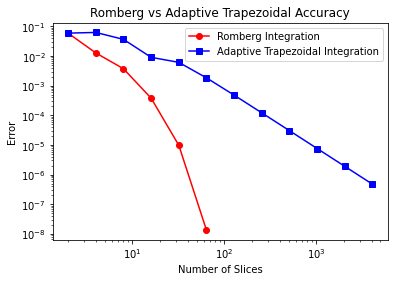

In [6]:
"""
Now, we graph
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot1 = ax.plot(N_romb[1:], errors_romb[1:], 'r', marker='o', label = "Romberg Integration")
plot2 = ax.plot(N_adap[1:], errors_adap[1:], 'b', marker='s', label = "Adaptive Trapezoidal Integration")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set(title = 'Romberg vs Adaptive Trapezoidal Accuracy',
      ylabel = 'Error',
      xlabel = 'Number of Slices')
plt.legend()
plt.show()

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

In [7]:
"""
In the book, the Legendre-Gauss method was used to obtain the weights and the nodes needed for
the Gaussian quadrature method. Below are functions that perform this method. Of course I will still
explain my understanding of each step using comments to show my understanding. 

P.S. eto rin po yung code na pinost sa debugging channel sa discord :)
"""


######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [8]:
N = 3
a = 0.0
b = 5.0


def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5


def gauss_quad(N, f, a, b):

    # Calculate the sample points and weights, then map them
    # to the required integration domain

    x,w = gaussxw(N)    # the samples points x and sample weights w here are calculated in the domain (-1, 1) according 
                        # equation 5.60. The next two lines will map the two quantities from the domain (-1,1) to the 
                        # desired domain (a,b). TLDR: we need to rescale the points and the weights. 


    xp = 0.5*(b-a)*x + 0.5*(b+a) # equation 5.61
    wp = 0.5*(b-a)*w             # equation 5.62

    # Perform the integration according to equation 5.63
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])
        
    return s

# on the other hand, we coul've just used gaussxwab which would've skipped the lines where we defined xp and wp (17, 18)

print(gauss_quad(N, f, a, b))

1450.000000000002


That's very impressive. It's so accurate that the error does not come from the algorithm itself, but only due to rounding errors of jupyter notebook. Much wow.

### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

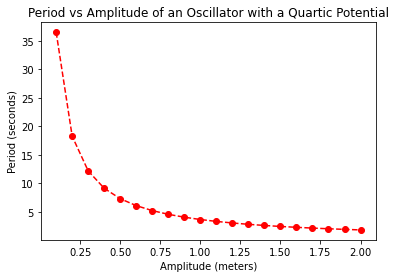

In [9]:
# ======== INPUT STUFF HERE =========
# Don't forget to define the gaussxw(N) function, which I put above. 

N_anharm = 20                           # number of points used in Gaussaian quadrature, 
                                        # basically the number of points between 0 and the amplitude
    
m = 1                                   # mass of particle, kg

amps = linspace(0.1, 2, N_anharm)       # amplitude of oscillator, remember we assume no friction so it doesn't die
                                        # off per integral. The first element can't be exactly 0 since  we will use it
                                        # to perform division later; we can use lesser values but they blow up the graph.

a = 0                                   # we initialize

def anharm_integrand(x):
    return np.sqrt(8*m) / np.sqrt(a**4 - x**4)      # put the integrand here
   
# ===================================

periods = []

for a in amps:
    periods.append(gauss_quad(N_anharm, anharm_integrand, 0, a))   # we integrate over all elements in amps, then store

# you can print(periods) and print(amps) here

"""
Now, we graph
"""


fig, ax = plt.subplots()
plot = ax.plot(amps, periods, ls='--', marker='o', color='r',)

ax.set(title = 'Period vs Amplitude of an Oscillator with a Quartic Potential',
      ylabel = 'Period (seconds)',
      xlabel = 'Amplitude (meters)')

plt.show()


In the context of the harmonic oscillator this is not what we expect. As the amplitude increases, the period of the pendulum should be longer since the mass will swing back and forth longer. 

However, for a Quartic potential the restoring force is much larger so the mass swings back much faster even in larger
amplitudes. 

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

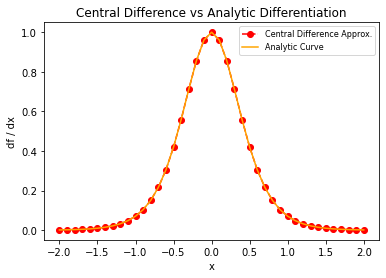

In [10]:
h = 10**(-5)                          # the "width of our linear fitted line", we use 10^-5 
                                      # as per the lecture slides so it's most accurate
x = np.arange(-2, 2.01, 0.1)          # values for x in the plot

def y(x):
    return 1 + 0.5*np.tanh(2*x)    # just the function

def central_diff(y, x_val):
    return (y(x_val+(h/2)) - y(x_val-(h/2))) / h   # just the formula for the central difference


derivative_yvals = np.array([])   # initialize for storage

for val in x:     # for every value in the array x, perform the central difference formula then store each in the array
    derivative_yvals = np.append(derivative_yvals, (central_diff(y, val)))


"""
Now, we graph, from here it's very readable naman na so yeah...
"""
def analytic_derivative(x):        # this is the analytic derivative that I calculated (sech(2x))^2.
    return (1/np.cosh(2*x))**2     # fun fact walang np.sech() so I had to use 1/np.cosh()

fig, ax = plt.subplots()
plot_numerical = ax.plot(x, derivative_yvals, ls='--', marker='o', color='r', label="Central Difference Approx.")
plot_analytic  = ax.plot(x, analytic_derivative(x), ls='solid', color='orange', label="Analytic Curve")


ax.set(title = 'Central Difference vs Analytic Differentiation',
      ylabel = 'df / dx',
      xlabel = 'x')


plt.legend(fontsize = '8')
plt.show()


As we can see, the central difference is very accurate!! This is because we used the most accurate value for h which 
was shared in the lecture (10^-5). We can see that the numerical points coincide exactly with the gaussian graph
in orange. Amazing


Gaussian nanaman??? Layuan moko Gauss nakaka-ilan ka na!